# Logistic Regression

A Classification model classifies/assigns groups to labeled data points. There are different classification algorithms and Logistic Regression is one.  

**Logistic Regression** is a classification algorithm used to separate data into classes.

`Logistic (Sigmoid) function`: 

- The sigmoid function (-infinity , infinity) classifies values as 0 or 1 (probability).
- In the real world, some classes aren’t clearly separable. 
- The logistic Sigmoid function generates a soft label for points that are hard to classify (on border) instead of the default hard label (0 or 1). It classifies a value as a fraction between 0 and 1. If you want a hard classifier you can always round the soft label to 0 or 1.

### Slicing Columns

To extract a column i from a Numpy matrix A and keep it as a column vector, use notation:
> Slicing Notation :   A[ : , i : i + 1]   → ex. A[:, 2:3]


### Linear Discriminant (Linear Boundary)

A **linear discriminant** is a line (or hyperplane, in higher dimensions) that separates two classes of data in a dataset.

The boundary line can be described using the equation: 
> 𝜃^𝑇𝑥 = 0
    - 𝜃 is a vector of coefficients (like weights in a linear equation).
    - 𝑥 is a point in the data space (a vector of features).
    - When 𝜃^𝑇𝑥 = 0, the point 𝑥 is exactly on the boundary.

Example: We have two features (or predictors), 𝑥1 and 𝑥2, and an intercept term (constant) 𝑥0 = 1, then:  𝜃𝑥0 + 𝜃𝑥1 + 𝜃2 = 0
- For any point 𝑥 that’s not on the line, 𝜃^𝑇𝑥 will give a value that is either positive or negative
    - Positive (𝜃^𝑇𝑥 > 0): The point is on one side of the boundary.
    - Negative (𝜃^𝑇𝑥 < 0): The point is on the other side of the boundary.
- This property allows us to use 𝜃^𝑇𝑥 as a classifier. By checking if the result is positive or negative, we can assign a label to the point 𝑥, effectively classifying it as belonging to one of the two classes. 

**Heaviside Function** 

The Heaviside function 𝐻(𝑦), is used to convert these positive and negative results into binary labels (0 or 1). 1 if y >0 and 0 if y<=0.

By applying 𝐻(𝑦) to 𝜃^𝑇𝑥 we convert the continuous result of 𝜃^𝑇𝑥 into a binary classification 1 or 0:


**Exercise 0** (2 points). Given a **m×(d+1)** matrix of augmented points (i.e., the X matrix) and a column vector θ of length **d+1**, implement a function to compute the value of the linear discriminant at each point. That is, the function should return a (column) vector y where the  yi=θTx̂ i.

In [10]:
# Example data
X = np.array([[1, 2, 3], [1, 4, 5], [1, 6, 7]])  # m x (d+1) matrix
theta = np.array([[0.5], [1], [1.5]])            # (d+1) x 1 column vector

In [24]:
import pandas as pd
import numpy as np
def lin_discr(X, theta):
    ###
    ### YOUR CODE HERE
    ###
    """   
    Computes the linear discriminant value for each point in X.
    Parameters:
     X = matrix
     m = rows
     d = predictors
     theta = column vector of length d+1
    """
    y = X.dot(theta)
    print(X.shape)
    print(theta.shape)
    return y.reshape(-1,1)
    
print(lin_discr(X, theta))

(3, 3)
(3, 1)
[[ 7.]
 [12.]
 [17.]]


**Exercise 1** (2 points). Implement the heaviside function, H(y). Your function should allow for an arbitrary matrix of input values and should apply the heaviside function to each element. In the returned matrix, the elements should have a **floating-point type**.

Example, the code snippet

```python
    A = np.array([[-0.5, 0.2, 0.0],
                  [4.2, 3.14, -2.7]])
    print(heaviside(A))
```

should display

```
    [[ 0.  1.  0.]
     [ 1.  1.  0.]]
```


In [39]:
def heaviside(Y):
    ###
    ### YOUR CODE HERE
    ###
    """   
    Applies the Heaviside function elementwise to the input matrix Y.
    Parameters:
      Y = input matrix
      return a matrix with elemwise heavside function applied
    """
    return (Y>0).astype(float)
    return np.maximum(0, np.sign(Y))  #np.sign assigns 1 for + and 0 for -; max replaces all - with 0

# Apply the Heaviside function
print(heaviside(np.array([[-0.5, 0.2, 0.0], [4.2, 3.14, -2.7]])))

[[0. 1. 0.]
 [1. 1. 0.]]


### Guessing Boundary

The helper function np_col_vec(list_values) converts a list of scalar values (e.g., [-1, 3, 0]) into a column vector that can be used as 𝜃 for the linear discriminant.
​
$$\theta = \left[\begin{array}{c} -1 \\ 3 \\ 0 \end{array}\right]$$
​
The output says "Detected 123 mismatches out of 375 cases." This means that the boundary defined by θ does not perfectly separate the two classes. A mismatch occurs when the guessed boundary misclassifies a point, meaning it assigns the wrong label to that point.

> To improve the boundary, you can try different values of 𝜃 and see if they result in fewer mismatches. However, an even better approach would be to use a learning algorithm (logistic regression) to find the optimal 𝜃 values rather than guessing.

**Exercise 2** (2 points). In the code cell below, try to find a better $\theta$! You can do that by randomly guessing coordinates for $\theta$ by hand until you find a good one. (If you are a bit more clever, you might eyeball a line and use that to make an informed guess.)

Store your $\theta$ in a variable named `my_theta`, which should be a Numpy _column vector_. You can use `np_col_vec()`, e.g.,

```python
my_theta = np_col_vec([-1., 3., 0.])
```

The test cell will generate a plot like the one above showing how well you did, and checking that you committed at most 10 mismatches.

> Hint: We found a set of coefficients that commits just 5 errors for the 375 input points.

New theta: [1. 1. 2.]
Mismatches: 69938


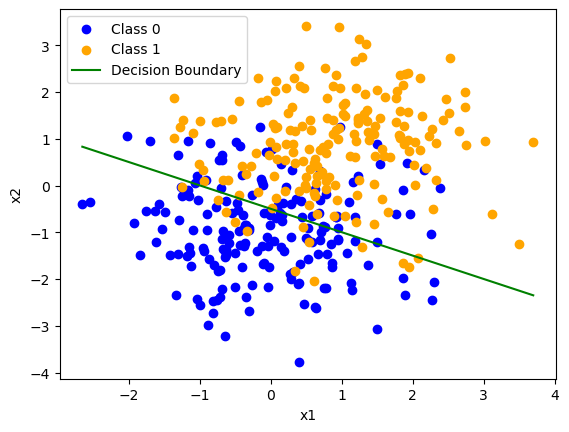

In [82]:
import numpy as np
import matplotlib.pyplot as plt

def np_col_vec(list_values):
    """Converts a list of values to a column vector."""
    return np.array([list_values]).T

def compute_mismatches(X, y, theta):
    """Computes mismatches based on the guessed boundary defined by theta."""
    X_augmented = np.hstack((np.ones((X.shape[0], 1)), X))  # Add intercept
    predictions = (X_augmented.dot(theta) > 0).astype(int)
    return np.sum(predictions != y)

def plot_decision_boundary(X, y, theta):
    """Plots the data points and the decision boundary defined by theta."""
    plt.scatter(X[y == 0][:, 0], X[y == 0][:, 1], color='blue', label='Class 0')
    plt.scatter(X[y == 1][:, 0], X[y == 1][:, 1], color='orange', label='Class 1')
    
    # Define the boundary line
    x_values = np.array([X[:, 0].min(), X[:, 0].max()])
    y_values = -(theta[0] + theta[1] * x_values) / theta[2]
    plt.plot(x_values, y_values, color="green", label="Decision Boundary")
    
    plt.xlabel("x1")
    plt.ylabel("x2")
    plt.legend()
    plt.show()

# Generate synthetic data
np.random.seed(0)
m = 375
X = np.vstack([
    np.random.randn(m // 2, 2) + [0, -1],
    np.random.randn(m // 2, 2) + [1, 1]
])
y = np.array([0] * (m // 2) + [1] * (m // 2))


# Test different theta values
initial_theta = np_col_vec([-1., 3., 0.]) # 123 mismatches
###
### YOUR CODE HERE
###
new_theta = np_col_vec([1., 1, 2]) 

print("New theta:", new_theta.flatten())
print("Mismatches:", compute_mismatches(X, y, new_theta)) #incorrect
plot_decision_boundary(X, y, new_theta)

### The logistic (sigmoid) function

As the example suggests, real data is not likely to be cleanly separable, especially when the number of features we have at our disposal is relatively small.

Since the labels are 0 or 1, you could look for a way to interpret labels as probabilities rather than as hard (0 or 1) labels. One such function is the logistic function, also referred to as the **logit** or `sigmoid function`.
$$
\begin{array}{rcl}
  G(y) & \equiv & \dfrac{1}{1 + e^{-y}}
\end{array}
$$

The logistic function takes any value in the domain $(-\infty, +\infty)$ and produces a value in the range $(0, 1)$. Thus, given a value $y$, we can interpret $G(y)$ as a conditional probability that the label is 1 given $y$, i.e., $G(y) \equiv \mathrm{Pr}[\mbox{label is }1 \,|\, y]$.


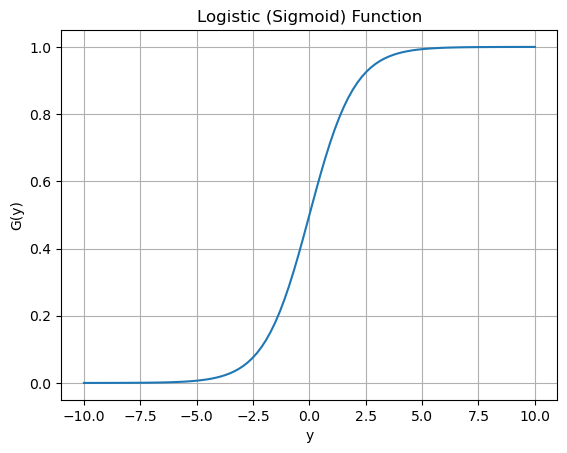

In [101]:
def logistic(Y):
    ###
    ### YOUR CODE HERE
    ###
    """
    Applies the logistic function elementwise to the input matrix Y.
    """
    G = 1 / (1 + np.exp(-Y))
    return G


# Plot your function
y_values = np.linspace(-10, 10, 100)
G_values = logistic(y_values)
plt.plot(y_values, G_values)
plt.title("Logistic (Sigmoid) Function")
plt.xlabel("y")
plt.ylabel("G(y)")
plt.grid(True)
plt.show()

### Maximum Likelihood Estimation (MLE)

MLE is a statistical method used to estimate the optimal parameters (𝜃) of a model by maximizing the "likelihood" that the observed data came from that model. In simpler terms, we want to find the parameter values that make the observed data most likely.

We want to find a vector of parameters 𝜃 that can help us classify data points accurately. Instead of guessing 𝜃, MLE allows us to compute it mathematically.

1. Define the Likelihood Function
   - The likelihood function is a measure of how well a set of parameters 𝜃 explains the observed data. Given our data points 𝑋 and their labels 𝑦, we want to find 𝜃 that maximizes the probability of observing 𝑦 given 𝑋 and 𝜃. We denote this probability as Pr[y∣X,θ].
   - Assume each data point is independent. So take the sum of all points.
   - Use the Log-Likelihood for Simplicity instead of maximizing the likelihood directly.
  
MLE Fitting (finding optimal 𝜃)
- define Pr[y∣X,θ] based on model
- find optimal 𝜃 that maximizes log-likihood L(θ;y,X) using optimization algorithms like gradient descent.

### MLE for logistic regression

In logistic regression, we want to find the parameters 𝜃 that maximize the likelihood of observing the given data.
1.  Logistic Function 𝐺(𝑥𝑖^𝑇𝜃):
    - The probability of a data point 𝑥𝑖 being labeled as 1 (i.e., 𝑦𝑖=1) is modeled using the logistic function 𝐺(𝑥𝑖^𝑇𝜃)

$$
\begin{array}{rcl}
  𝐺(𝑥𝑖^𝑇𝜃) & \equiv & \dfrac{1}{1 + e^{-y}}
\end{array}
$$

2. Bernoulli Trial:
    - Since each label 𝑦𝑖 is either 0 or 1, use a Bernoulli distribution to describe the probability of each outcome.
    - Pr[𝑦𝑖∣X𝑖,θ] = 𝐺(𝑥𝑖^𝑇𝜃)^𝑦𝑖 * (1-𝐺(𝑥𝑖^𝑇𝜃))^1-𝑦𝑖
    - 𝑦𝑖 = 1, then 𝐺(𝑥𝑖^𝑇𝜃)
    - 𝑦𝑖 = 0, then 1-𝐺(𝑥𝑖^𝑇𝜃)

  
3. Log-Likelihood Function:
   - Use logarithm of the likelihood, which turns the product into a sum.
   - To simplify notation, two conventions are used:
     1. Convention 1: Use a vector of ones 𝑢 to sum over all elements. 
     2. Convention 2: Apply functions elementwise to matrices so 𝐺(𝑋𝜃) applies 𝐺 to each element in 𝑋𝜃.

$$
\begin{array}{rrcl}
  (\mathrm{V1}) & \mathcal{L}(\theta; y, X) & = & y^T \ln G(X \theta) + (u-y)^T \ln [u - G(X \theta)] \\
  (\mathrm{V2}) & \mathcal{L}(\theta; y, X) & = & y^T X \theta + u^T \ln G(-X \theta)
\end{array}
$$


**Exercise 6** (2 points). Implement the log-likelihood function. To compute the elementwise logarithm of a matrix or vector, use Numpy's log function.

In [127]:
# Sample dataset 
np.random.seed(0)
X = np.random.rand(10, 2)  # 10 data points with 2 features
X = np.c_[np.ones(X.shape[0]), X]  # Add intercept term (column of ones)
y = np.random.randint(0, 2, size=(10, 1))  # Binary labels (0 or 1)

theta = np.random.randn(3, 1)

# print("Feature matrix (X):\n", X)
# print("\nLabels (y):\n", y)
# print("\nInitial parameters (theta):\n", theta)

In [129]:
def logistic(z):
    return 1 / (1 + np.exp(-z)) # logistic(y)
    #Applies the logistic function elementwise; handles vectors and matrices.

def log_likelihood(theta, y, X):
    ###
    ### YOUR CODE HERE
    ###
    #logistic funtion G(X𝜃))
    G = logistic(X @ theta) #can also use dot() for matrix multiplication
    
    #Log-likelihood
    u= 1 #np.ones(?)
    log_likelihood_value = y.T @ np.log(G) + (u-y).T @ np.log(u-G)
    return log_likelihood_value

print(log_likelihood(theta, y, X))

[[-8.89961656]]


### Gradient Ascent 

To maximize the log-likelihood function for logistic regression. The gradient is given by:
> ∇𝜃𝐿(𝜃;𝑦,𝑋)= 𝑋^𝑇[𝑦−𝐺(𝑋𝜃)]


**Exercise 8** (2 points). Implement a function to compute the gradient of the log-likelihood.

In [133]:
def grad_log_likelihood(theta, y, X):
    """Returns the gradient of the log-likelihood."""
    ###
    ### YOUR CODE HERE
    ###
    #logistic/sigmoid function
    G = logistic(X @ theta)
    
    #Gradient
    gradient = X.T @ (y-G)
    return gradient
    
print(grad_log_likelihood(theta, y, X))

[[3.77200074]
 [2.46582565]
 [2.14924759]]
